# Regession logistique

### Choix du modéle

$\huge
p(y = 1 | x) = \frac{1}{1 + e^{-(\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n)}}$

### Importation des librairies

In [22]:
import numpy as np
import pandas as pd
import os
import sys
import pickle  
from sklearn.linear_model import LogisticRegression
from pathlib import Path
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
#from mlxtend.plotting import plot_decision_regions

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, auc

In [23]:
### Importation des variables

In [24]:
with open('variables.pkl', 'rb') as f:
    (fold_indices, df, X_train, X_test, y_train, y_test,
                 X_train_1, Y_train_1, X_train_2, Y_train_2, 
                 X_train_3, Y_train_3, X_train_4, Y_train_4, 
                 X_train_5, Y_train_5,  
                 X_test_1, Y_test_1, X_test_2, Y_test_2, 
                 X_test_3, Y_test_3, X_test_4, Y_test_4,
                 X_test_5, Y_test_5, ) = pickle.load(f)

In [25]:
base_dir = os.path.dirname(os.path.abspath(sys.argv[1]))
file_path = os.path.join(base_dir, "..\Data\sobar-72.csv")  
raw_path = Path(file_path)
corrected_path = raw_path.resolve()
print("Base directory:", base_dir)
print("File path:", file_path)
print("corrected path:", corrected_path)
df = pd.read_csv(corrected_path)

Base directory: C:\Users\serig\OneDrive - Université Côte d'Azur\2 éme année\Cancer\Cervical-Cancer-Risk-Classification\Code
File path: C:\Users\serig\OneDrive - Université Côte d'Azur\2 éme année\Cancer\Cervical-Cancer-Risk-Classification\Code\..\Data\sobar-72.csv
corrected path: C:\Users\serig\OneDrive - Université Côte d'Azur\2 éme année\Cancer\Cervical-Cancer-Risk-Classification\Data\sobar-72.csv


### Instanciation et entrainement

In [26]:
# Entraînement du modèle de régression logistique
model_logreg = LogisticRegression(max_iter=1000, random_state=42)
model_logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

### Evaluation du modéle

In [27]:
# Prédictions
y_pred = model_logreg.predict(X_test)
y_prob = model_logreg.predict_proba(X_test)[:, 1]

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy:.2f}")
print("\nRapport de Classification :\n", classification_report(y_test, y_pred))
print("\nMatrice de Confusion :\n", confusion_matrix(y_test, y_pred))


Précision du modèle : 0.95

Rapport de Classification :
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.89      1.00      0.94         8

    accuracy                           0.95        22
   macro avg       0.94      0.96      0.95        22
weighted avg       0.96      0.95      0.96        22


Matrice de Confusion :
 [[13  1]
 [ 0  8]]


### Courbe ROC

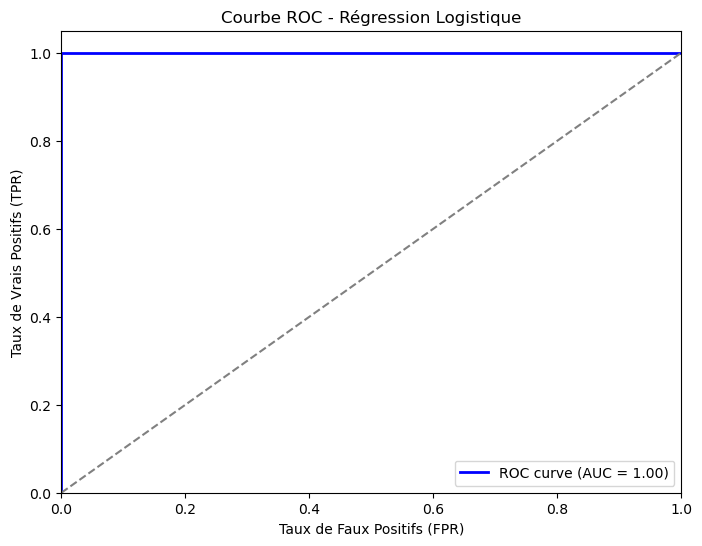

In [28]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC - Régression Logistique')
plt.legend(loc="lower right")
plt.show()

### Interpretation

### Regression logistique avec Cross-Validation


 Fold 1/5
 Précision : 0.70

 Fold 2/5
 Précision : 0.90

 Fold 3/5
 Précision : 1.00

 Fold 4/5
 Précision : 0.90

 Fold 5/5
 Précision : 0.80


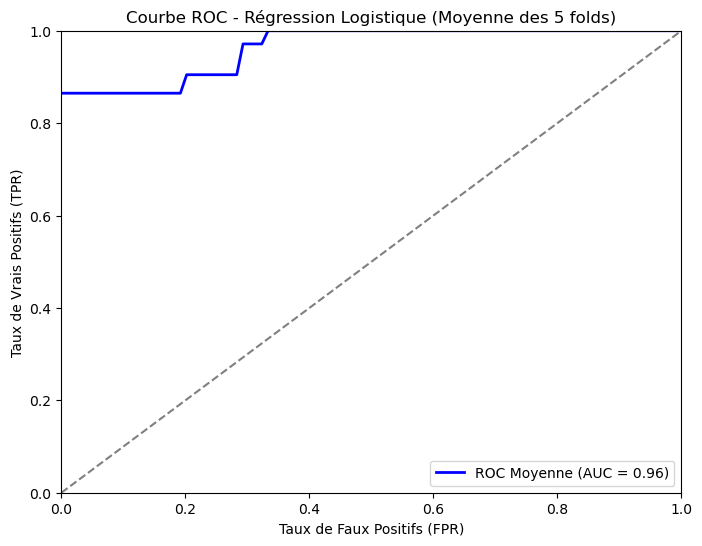


 Précision moyenne du modèle : 0.86


In [29]:
# Chargement des données
with open('variables.pkl', 'rb') as f:
    (fold_indices, df, X_train, X_test, y_train, y_test,
     X_train_1, Y_train_1, X_train_2, Y_train_2, 
     X_train_3, Y_train_3, X_train_4, Y_train_4, 
     X_train_5, Y_train_5,  
     X_test_1, Y_test_1, X_test_2, Y_test_2, 
     X_test_3, Y_test_3, X_test_4, Y_test_4,
     X_test_5, Y_test_5) = pickle.load(f)

# Initialisation des listes pour stocker les résultats
accuracies = []
mean_fpr = np.linspace(0, 1, 100)
tprs = []

# Boucle sur les 5 folds
for i in range(1, 6):
    print(f"\n Fold {i}/5")
    
    # Sélection des ensembles d'entraînement et de test
    X_train_fold = locals()[f'X_train_{i}']
    y_train_fold = locals()[f'Y_train_{i}']
    X_test_fold = locals()[f'X_test_{i}']
    y_test_fold = locals()[f'Y_test_{i}']

    # Modèle de régression logistique
    model_logreg = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)
    model_logreg.fit(X_train_fold, y_train_fold)

    # Prédictions
    y_pred = model_logreg.predict(X_test_fold)
    y_prob = model_logreg.predict_proba(X_test_fold)[:, 1]  # Probabilité de la classe positive

    # Évaluation
    accuracy = accuracy_score(y_test_fold, y_pred)
    accuracies.append(accuracy)
    print(f" Précision : {accuracy:.2f}")

    # Courbe ROC
    fpr, tpr, _ = roc_curve(y_test_fold, y_prob)
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    tprs.append(interp_tpr)

# Calcul de la moyenne des courbes ROC
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)

# Affichage de la courbe ROC moyenne
plt.figure(figsize=(8, 6))
plt.plot(mean_fpr, mean_tpr, color='blue', lw=2, label=f'ROC Moyenne (AUC = {mean_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonale
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC - Régression Logistique (Moyenne des 5 folds)')
plt.legend(loc="lower right")
plt.show()

# Précision moyenne
mean_accuracy = np.mean(accuracies)
print(f"\n Précision moyenne du modèle : {mean_accuracy:.2f}")